<a href="https://colab.research.google.com/github/AhmadRafif22/PCVK_Genap_2023/blob/main/UAS_RAFIF_DAFFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Project - Mata Kuliah PCVK 2023

## Menghitung jumlah diamond pada kartu remi menggunakan multiple template matching dan canny

## Anggota Kelompok

1.   Ahmad Rafif Alaudin (2041720230) 
2.   Daffa Aqila Rahmatullah (2041720098)





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

### A. Menggunakan Multiple Template Matching

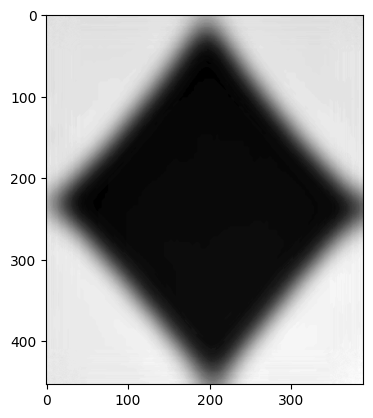

In [25]:
# Preprocessing template image

template_img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/lain lain/PVCK/UAS/wajik_blur.png',0)
plt.imshow(template_img, cmap='gray')
plt.show()

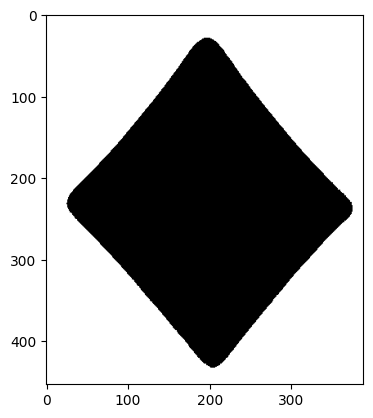

In [4]:
_, img_binary = cv.threshold(template_img, 127, 255, cv.THRESH_BINARY)

plt.imshow(img_binary, cmap='gray')
plt.show()

(<matplotlib.image.AxesImage at 0x7f38991c6740>,
 Text(0.5, 1.0, 'template image'))

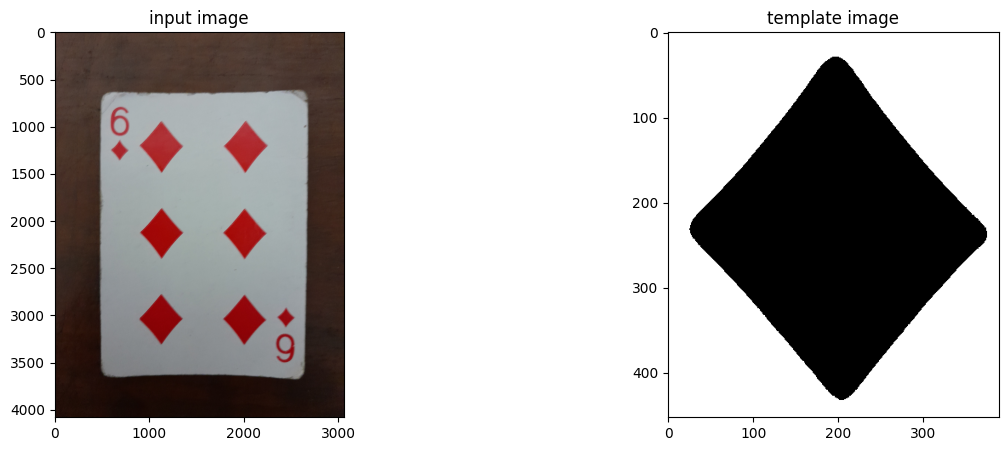

In [5]:
# load citra input
img_input = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/lain lain/PVCK/UAS/kartu.jpg')
img_gray = cv.cvtColor(img_input,cv.COLOR_BGR2GRAY)
img_copy = img_input.copy()

#load citra template
template = img_binary

#width dan height
w,h = template.shape[::-1]

#print
f, axarr = plt.subplots(1,2, figsize=(15,5))
axarr[0].imshow(cv.cvtColor(img_input, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

Total Object Found: 6


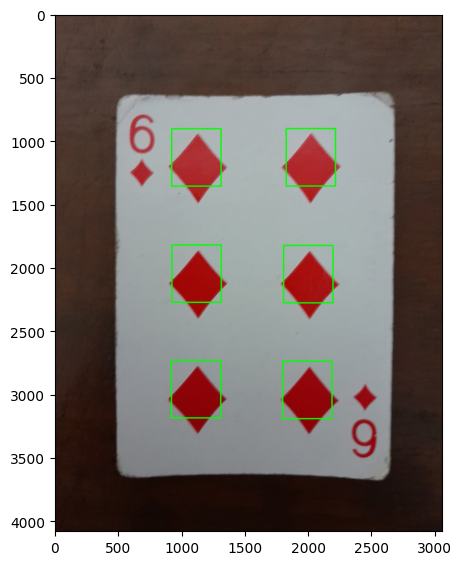

In [28]:
result = cv.matchTemplate(img_gray, template, cv.TM_CCOEFF_NORMED)

threshold = 0.55

loc = np.where(result >= threshold)

non_overlapping_loc = []

for pt in zip(*loc[::-1]):
    is_overlapping = False
    for existing_pt in non_overlapping_loc:
        if abs(existing_pt[0] - pt[0]) < w and abs(existing_pt[1] - pt[1]) < h:
            is_overlapping = True
            break

    if not is_overlapping:
        non_overlapping_loc.append(pt)
        cv.rectangle(img_input, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 10)

print("Total Object Found:", len(non_overlapping_loc))

plt.figure(figsize=(5, 20))
plt.imshow(cv.cvtColor(img_input, cv.COLOR_BGR2RGB))
plt.show()

### B. Menggunakan Canny

diamond in the image :  6


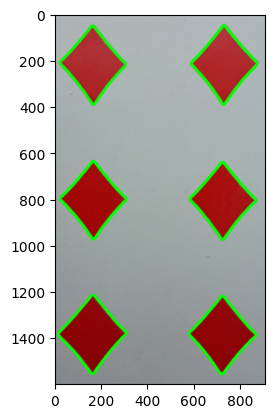

In [ ]:
image = cv.imread('/content/drive/MyDrive/PVCK/UAS/card_crop.jpg')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

_, img_binary = cv.threshold(gray, 126, 255, cv.THRESH_BINARY_INV)
  
blur = cv.GaussianBlur(img_binary, (19, 21), 0)
canny = cv.Canny(blur, 160, 335, 3)
dilated = cv.dilate(canny, (1, 1), iterations=0)
  
(cnt, hierarchy) = cv.findContours(
    dilated.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cv.drawContours(rgb, cnt, -1, (0, 255, 0), 10)
  
  
print("diamond in the image : ", len(cnt))


plt.imshow(rgb)

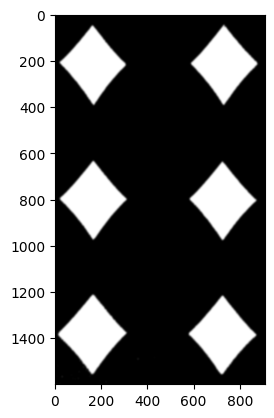

In [ ]:
plt.imshow(blur, cmap='gray')

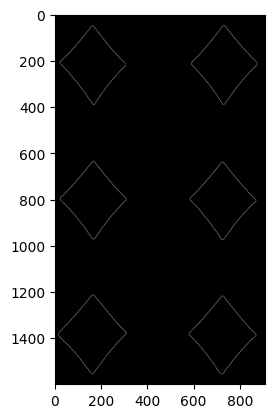

In [ ]:
plt.imshow(canny, cmap='gray')


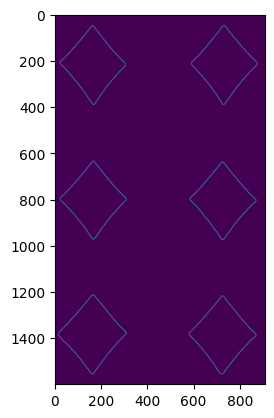

In [ ]:
plt.imshow(dilated)